In [10]:
from visual_behavior.data_access import loading, from_lims
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
osid = 1103720970
loading.get_motion_corrected_movie_h5_location(osid)

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/data_access/loading.py:2020: UserWarning: this function is deprecated and will be removed in a future version, please use from_lims.get_motion_xy_offset_filepath instead
  warnings.warn(warn_str)
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/data_access/loading.py:1990: UserWarning: this function is deprecated and will be removed in a future version, please use from_lims.get_motion_corrected_movie_filepath instead
  warnings.warn(warn_str)


'//allen/programs/braintv/production/visualbehavior/prod5/specimen_1075943220/ophys_session_1103517548/ophys_experiment_1103720970/processed/1103720970_suite2p_motion_output.h5'

In [5]:
oeid = 1103720970
movie = loading.load_motion_corrected_movie(oeid)
np.shape(movie)

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/data_access/loading.py:2047: UserWarning: this function is deprecated and will be removed in a future version, please use from_lims.load_motion_corrected_movie instead
  warnings.warn(warn_str)


(46222, 512, 512)

In [6]:
movie_length = movie.shape[0]
movie_mean = np.empty((movie_length))
snippet_length = 100
for i in tqdm(range(0, movie_length, snippet_length), desc='gathering mean fluorescence'):
    start = i
    end = min(i+snippet_length, movie_length)
    movie_mean[start:end] = movie[start:end, :,:].mean(axis=(1,2))

gathering mean fluorescence: 100%|██████████| 463/463 [03:57<00:00,  1.95it/s]


In [13]:
df = pd.DataFrame({'time': dataset.ophys_timestamps, 'movie_mean':movie_mean})
df.to_csv('/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/movie_mean_oeid=1103720970.csv', index = False)

In [7]:
dataset = loading.get_ophys_dataset(oeid)

<IPython.core.display.Javascript object>


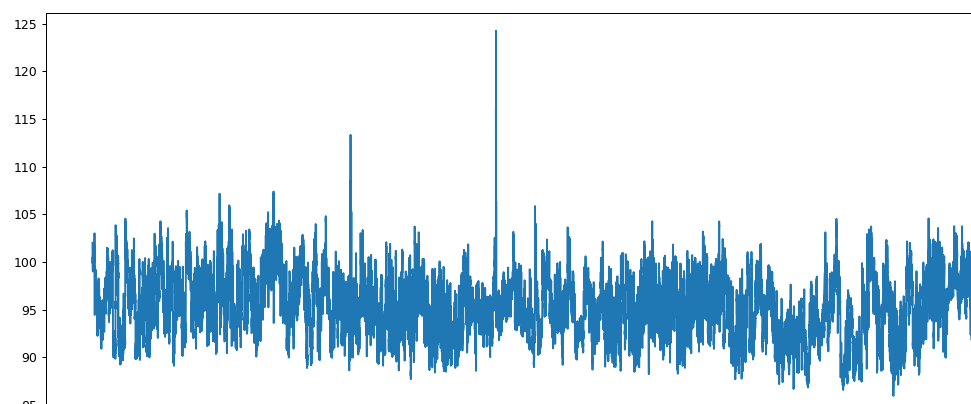

In [9]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(dataset.ophys_timestamps, movie_mean)
fig.tight_layout()